In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import os
import re
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/content/drive/MyDrive/data/star_classification.csv')


/content/drive/MyDrive/data/test.csv
/content/drive/MyDrive/data/sample_submission.csv
/content/drive/MyDrive/data/train.csv
/content/drive/MyDrive/data/star_classification.csv
/content/drive/MyDrive/data/Star_dataset/Star9999_raw.csv
/content/drive/MyDrive/data/Star_dataset/Star3642_balanced.csv
/content/drive/MyDrive/data/Star_dataset/Star99999_raw.csv
/content/drive/MyDrive/data/Star_dataset/Star39552_balanced.csv


Eksploracyjna analiza danych

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
a, b, c = df["class"].value_counts() / len(df)
print(f"Total percentage of Galaxies : {round(a*100, 1)}%")
print(f"Total percentage of Stars : {round(b*100, 1)}%")
print(f"Total percentage of QSO : {round(c*100, 1)}%")

Total percentage of Galaxies : 59.4%
Total percentage of Stars : 21.6%
Total percentage of QSO : 19.0%


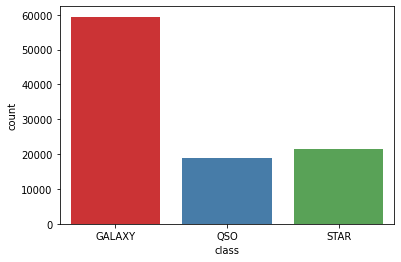

In [ ]:
sbn.countplot(x = df['class'], palette = 'Set1')

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Wizualizacja danych

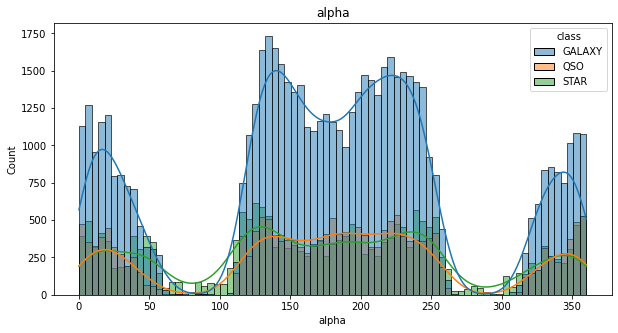

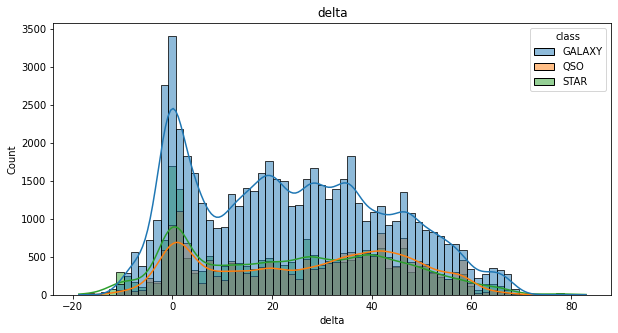

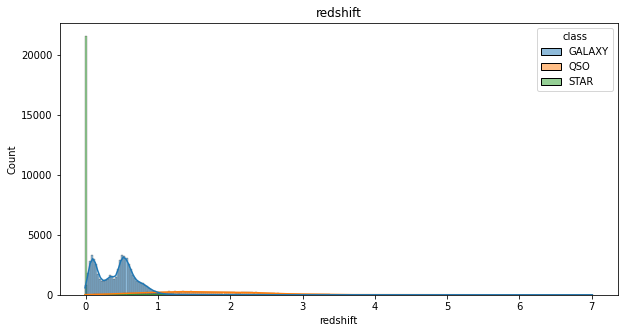

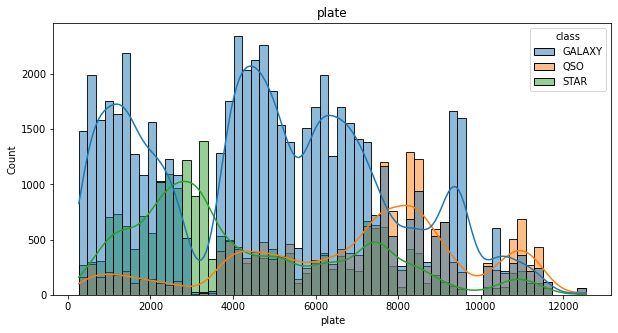

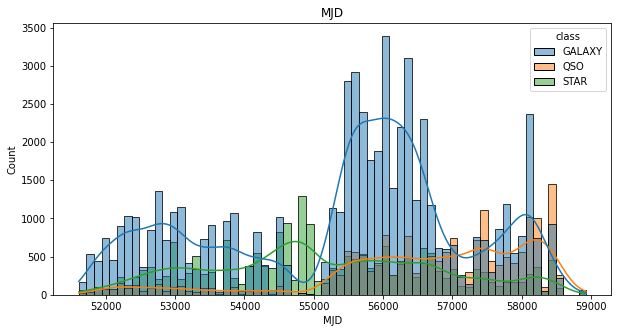

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(10,5))
    sbn.histplot(data=df, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
df["class"] = lab_enc.fit_transform(df["class"])
df["class"] = df["class"].astype(int)

def plot(column):
    for i in range(3):
        sbn.kdeplot(data=df[df["class"] == i][column], label = lab_enc.inverse_transform([i]), fill = True)
    sbn.kdeplot(data=df[column],label = ["All"], fill = True)
    plt.legend();
    
def log_plot(column):
    for i in range(3):
        sbn.kdeplot(data=np.log(df[df["class"] == i][column]), label = lab_enc.inverse_transform([i]), fill = True)
    sbn.kdeplot(data=np.log(df[column]),label = ["All"], fill = True)
    plt.legend();   

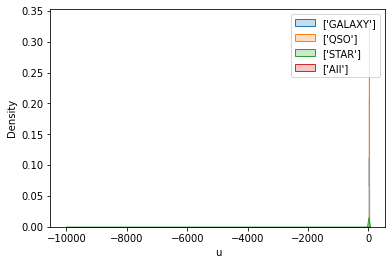

In [ ]:
plot('u')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


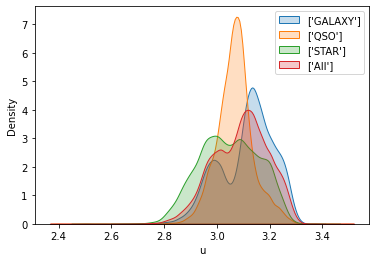

In [ ]:
log_plot('u')

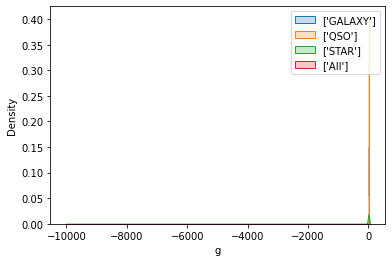

In [ ]:
plot('g')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


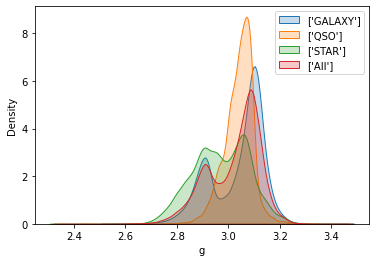

In [ ]:
log_plot('g')

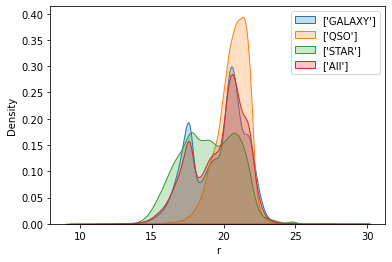

In [ ]:
plot('r')

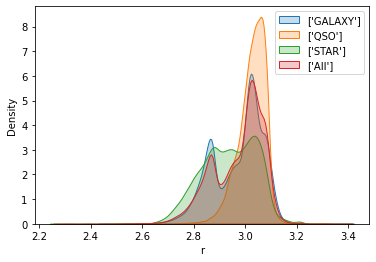

In [ ]:
log_plot('r')

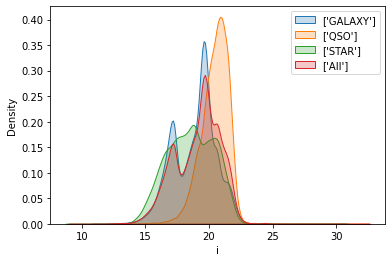

In [ ]:
plot('i')

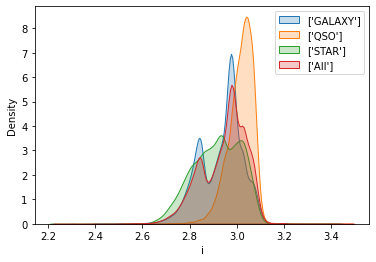

In [ ]:
log_plot('i')

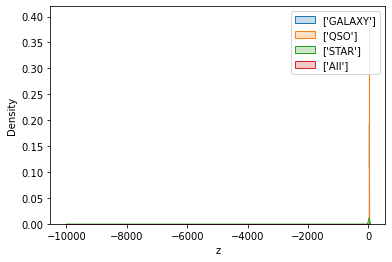

In [ ]:
plot('z')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


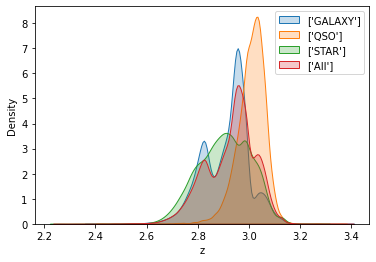

In [ ]:
log_plot('z')

Data Preprocessing

In [ ]:
def rem_outliers():
    d1 = df.shape

    for i in df.select_dtypes(include = 'number').columns:
        qt1 = df[i].quantile(0.25)
        qt3 = df[i].quantile(0.75)
        iqr =  qt3 - qt1
        lower = qt1-(1.5*iqr)
        upper = qt3+(1.5*iqr)
        min_in = df[df[i]<lower].index
        max_in = df[df[i]>upper].index
        df.drop(min_in, inplace = True)
        df.drop(max_in, inplace = True)
    
    d2 = df.shape
    ol = d1[0] - d2[0]
    return ol


In [ ]:
print("Number of deleted outliers  are : ", rem_outliers())

Number of deleted outliers  are :  14266


In [ ]:
df = df.copy()

df.drop(['run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','obj_ID'],axis=1, inplace = True)

X = df.drop('class',axis=1)
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=43)
    
ss = StandardScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns, index = X_test.index)



Modele klasyfikacyjne scikit-learn

In [ ]:
#KNN
%%time
modelKNN = KNeighborsClassifier()
param_grid = {"n_neighbors": [11, 12, 13, 14, 15, 16, 17, 18], "metric": ["minkowski", "chebyshev"]}
GridKNN = GridSearchCV(estimator = modelKNN, param_grid = param_grid, cv = 5)
GridKNN.fit(X_train, y_train)
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)


0.945529031368614
11
minkowski
CPU times: user 1min 43s, sys: 1.27 s, total: 1min 45s
Wall time: 1min 45s


In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 11, metric = "minkowski")

modelKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = modelKNN.predict(X_test)
y_prob_pred = modelKNN.predict_proba(X_test)

In [ ]:
#Confusion Matrix

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[10596   107   247]
 [  259  1245    17]
 [  220     0  3730]]


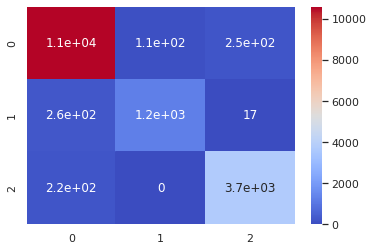

In [ ]:
sbn.heatmap(matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Roc auc: {roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')}")

Accuracy: 0.9482370135801718
Roc auc: 0.9729223372722635


In [ ]:
#RandomForestClassifier
%%time
ran_for=RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 5, 6, 7]
}
gridRFC = GridSearchCV(estimator=ran_for, param_grid=param_grid)
gridRFC.fit(X_train, y_train) 

best_parameters = gridRFC.best_params_
print(best_parameters)

{'max_depth': 7, 'n_estimators': 50}
CPU times: user 27min 1s, sys: 4.88 s, total: 27min 6s
Wall time: 27min 36s


In [ ]:
ran_for = RandomForestClassifier(n_estimators = 50, max_depth = 7)
ran_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

In [ ]:
y_pred = ran_for.predict(X_test)
y_prob_pred = ran_for.predict_proba(X_test)

In [ ]:
#Confusion Matrix
matrix1 = confusion_matrix(y_test, y_pred)
print(matrix1)

[[10760    91    99]
 [  326  1194     1]
 [    0     0  3950]]


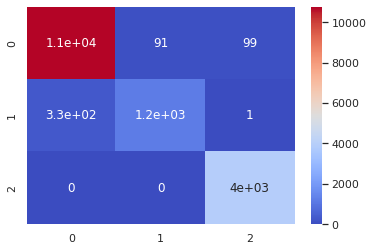

In [ ]:
sbn.heatmap(matrix1, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Roc auc: {roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')}")

Accuracy: 0.9685159247305279
Roc auc: 0.9885203933281139


Sieć neuronowa 

In [ ]:
import tensorflow as tf

modelNN = tf.keras.models.Sequential()

In [ ]:
modelNN.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
modelNN.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
modelNN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
modelNN.compile(optimizer='adam', loss='mse', metrics= ['accuracy'])


In [ ]:
%%time
history = modelNN.fit(X_train, y_train, epochs = 50, batch_size = 16,  validation_data=(X_test, y_test))

Epoch 1/50
4287/4287 [==============================] - 12s 3ms/step - loss: 0.2875 - accuracy: 0.7112 - val_loss: 0.2902 - val_accuracy: 0.7195
Epoch 2/50
4287/4287 [==============================] - 8s 2ms/step - loss: 0.2781 - accuracy: 0.7191 - val_loss: 0.2758 - val_accuracy: 0.7178
Epoch 3/50
4287/4287 [==============================] - 8s 2ms/step - loss: 0.2752 - accuracy: 0.7218 - val_loss: 0.2707 - val_accuracy: 0.7251
Epoch 4/50
4287/4287 [==============================] - 8s 2ms/step - loss: 0.2734 - accuracy: 0.7234 - val_loss: 0.2718 - val_accuracy: 0.7227
Epoch 5/50
4287/4287 [==============================] - 8s 2ms/step - loss: 0.2731 - accuracy: 0.7239 - val_loss: 0.2757 - val_accuracy: 0.7177
Epoch 6/50
4287/4287 [==============================] - 10s 2ms/step - loss: 0.2712 - accuracy: 0.7254 - val_loss: 0.2722 - val_accuracy: 0.7216
Epoch 7/50
4287/4287 [==============================] - 8s 2ms/step - loss: 0.2703 - accuracy: 0.7266 - val_loss: 0.2779 - val_accurac

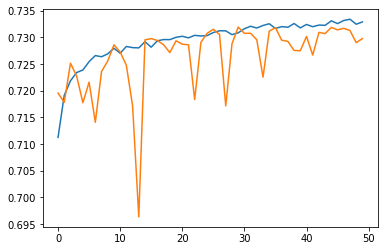

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
y_pred = modelNN.predict(X_test)
y_pred

array([[9.5731020e-04],
       [6.9707632e-03],
       [3.6361814e-04],
       ...,
       [1.0000000e+00],
       [5.8252215e-03],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_proba = np.argmax(y_pred, axis = 1)
y_proba

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_proba.shape

(17147,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def validateModel(x, y, cls):
  y_pred = cls.predict(x)
  acc = accuracy_score(y, tf.round(y_pred))   
  

  return (acc)

In [ ]:
validateModel(X_test, y_proba, modelNN)

0.6493264127835773

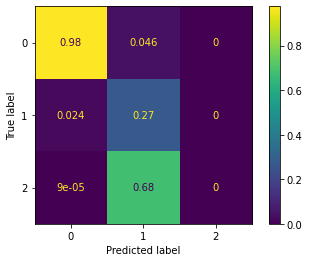

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelNN.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred), normalize='pred')
plt.show()